# Challenge 3

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
# Example code that is useful for the following questions:

# (df.query('age in [35, 38, 55]')
#    .assign(new_column = df["age"]/df["fare"],
#            new_column_1 = df["age"]/df["fare"])
#    .loc[:,["survived", "sex", "class", "embark_town", "fare", "new_column", "new_column_1"]]
#    .groupby(["embark_town", "sex"])
#    .quantile([0.25,0.75])
#    # .max("fare")
#    # .sort_values(["new_column"])
#    # .pivot_table(...)
#    .rename(columns={'new_column': 'fraction'})
# )

In [188]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Point 1

In [189]:
def calc_bmi(weight, height):
        if weight/((height/100)**2) > 25: # Divide by 100 since height is in centimeters
            return 1
        elif weight/(height**2) <= 25:
            return 0

df['overweight'] = df.apply(lambda x: calc_bmi(x.weight, x.height), axis=1)

In [190]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Point 2

In [191]:
def calc_norm_123(input):
        if input == 1: 
            return 0
        else:
              return 1

df['cholesterol'] = df.apply(lambda x: calc_norm_123(x.cholesterol), axis=1)
df['gluc'] = df.apply(lambda x: calc_norm_123(x.gluc), axis=1)

In [192]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


# Point 3

In [193]:
sub_df = df.loc[:, ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']]

In [194]:
long =  pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
long = long.sort_values('variable', ascending=True)

In [195]:
# for col in ['cardio', 'variable', 'value']: # 'cardio', 'variable', 'value'
#     test[col] = test[col].astype('object') # 'category'

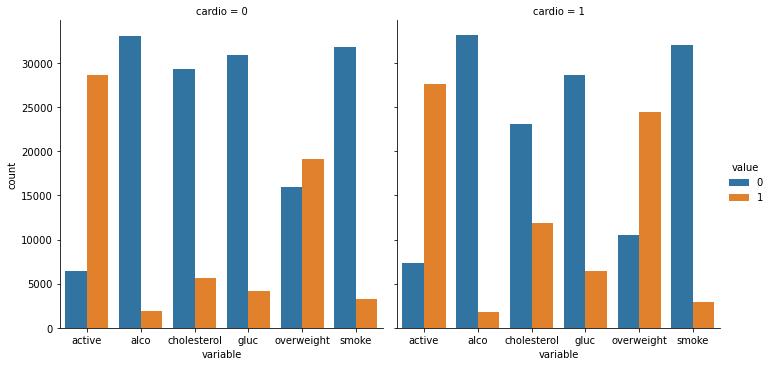

In [196]:
f = sns.catplot(
    data=long, x="variable", col = 'cardio', hue='value',
    kind="count"
)

In [200]:
fig = f.fig
fig.savefig("out.png") 

# Point 4

In [137]:
h_25 = df.height.quantile(0.025);h_75 = df.height.quantile(0.075)
w_25 = df.weight.quantile(0.025);w_75 = df.weight.quantile(0.075)


def calc_checks(pressure = False, ap_lo = None, ap_hi = None, w = False, weight = None, h = False, height = None):
        if pressure:
            if (ap_lo <= ap_hi): 
                return 1
            else:
                 return 0
        elif h:
             if (height >= h_25) & (height <= h_75):
                  return 1
             else:
                  return 0
        elif w:
             if (weight >= w_25) & (weight <= w_75):
                  return 1
             else:
                  return 0
            

150.0 153.0 51.0 51.0


In [139]:
df['check_p'] = df.apply(lambda x: calc_checks(pressure = True, ap_lo = x.ap_lo, ap_hi = x.ap_hi), axis=1)
df['check_w'] = df.apply(lambda x: calc_checks(w = True, weight = x.weight), axis=1)
df['check_h'] = df.apply(lambda x: calc_checks(h = True, height = x.height), axis=1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,check_p,check_w,check_h
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1,1,0


In [149]:
df['test_all'] = ((df['check_p'] == 1) & (df['check_h']  == 1) & (df['check_w']  == 1))

df_clean = (df.query('test_all in [1]')
   .loc[:,['id',	'age'	,'sex',	'height'	,'weight'	,'ap_hi'	,'ap_lo'	,'cholesterol',	'gluc',	'smoke'	,'alco'	,'active'	,'cardio'	]]
)

In [150]:
df_clean

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
145,197,18461,1,152,57.0,120,80,1,1,0,0,1,0
278,380,15229,1,150,55.0,120,70,1,1,0,0,0,0
293,403,21187,1,152,54.0,170,80,1,1,0,0,1,1
497,713,20449,1,151,53.0,120,80,1,1,0,0,1,0
528,760,21863,1,152,54.0,130,90,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68896,98433,19595,2,150,53.0,140,80,3,1,0,0,0,1
69443,99186,22538,1,152,55.0,170,90,3,2,0,0,0,1
69453,99198,18090,1,152,52.0,120,90,1,1,0,0,1,0
69535,99311,19038,1,153,54.0,140,80,1,1,0,0,1,0


# Point 4

In [152]:
df_clean.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
145,197,18461,1,152,57.0,120,80,1,1,0,0,1,0
278,380,15229,1,150,55.0,120,70,1,1,0,0,0,0
293,403,21187,1,152,54.0,170,80,1,1,0,0,1,1
497,713,20449,1,151,53.0,120,80,1,1,0,0,1,0
528,760,21863,1,152,54.0,130,90,1,1,0,0,1,1


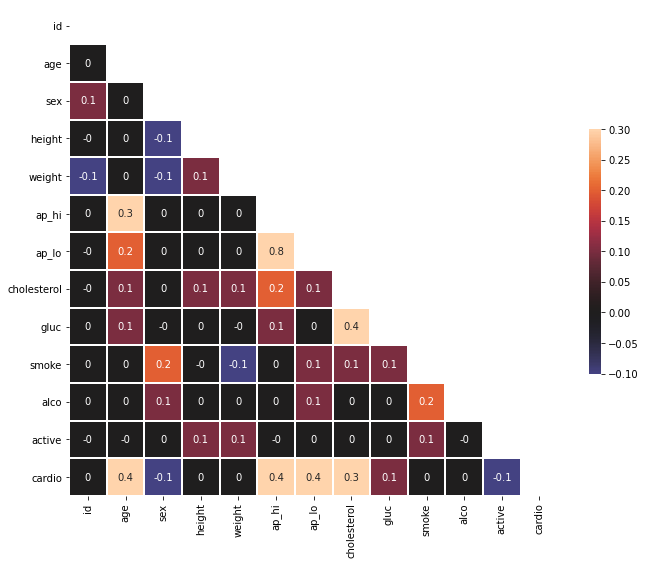

In [182]:
# Compute the correlation matrix
corr = df_clean.corr().round(1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True)

In [183]:
fig = f.get_figure()
fig.savefig("out_1.png") 

# Code for deployment

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Functions


def calc_bmi(weight, height):
  if weight / (
      (height / 100)**2) > 25:  # Divide by 100 since height is in centimeters
    return 1
  elif weight / (height**2) <= 25:
    return 0


def calc_norm_123(input):
  if input == 1:
    return 0
  else:
    return 1


def calc_checks(pressure=False,
                ap_lo=None,
                ap_hi=None,
                w=False,
                weight=None,
                h=False,
                height=None):
  if pressure:
    if (ap_lo <= ap_hi):
      return 1
    else:
      return 0
  elif h:
    if (height >= h_25) & (height <= h_75):
      return 1
    else:
      return 0
  elif w:
    if (weight >= w_25) & (weight <= w_75):
      return 1
    else:
      return 0


#####

# Import data
df = pd.read_csv('medical_examination.csv')

h_25 = df.height.quantile(0.025)
h_75 = df.height.quantile(0.075)
w_25 = df.weight.quantile(0.025)
w_75 = df.weight.quantile(0.075)

# Add 'overweight' column
df['overweight'] = df.apply(lambda x: calc_bmi(x.weight, x.height), axis=1)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = df.apply(lambda x: calc_norm_123(x.cholesterol), axis=1)
df['gluc'] = df.apply(lambda x: calc_norm_123(x.gluc), axis=1)

sub_df = df.loc[:, [
    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'
]]


# Draw Categorical Plot
def draw_cat_plot():
  # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
  df_cat = df.loc[:, [
      'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'
  ]]

  df_cat = pd.melt(df_cat,
                   id_vars=['cardio'],
                   value_vars=[
                       'cholesterol', 'gluc', 'smoke', 'alco', 'active',
                       'overweight'
                   ])
  df_cat = df_cat.sort_values('variable', ascending=True)

  # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
  #df_cat = None

  # Draw the catplot with 'sns.catplot()'

  # Get the figure for the output
  f = sns.catplot(data=df_cat,
                  x="variable",
                  col='cardio',
                  hue='value',
                  kind="count")

  # Do not modify the next two lines

  fig = f.fig
  fig.savefig('catplot.png')
  return fig


# Draw Heat Map
def draw_heat_map():

  df['check_p'] = df.apply(
      lambda x: calc_checks(pressure=True, ap_lo=x.ap_lo, ap_hi=x.ap_hi),
      axis=1)
  df['check_w'] = df.apply(lambda x: calc_checks(w=True, weight=x.weight),
                           axis=1)
  df['check_h'] = df.apply(lambda x: calc_checks(h=True, height=x.height),
                           axis=1)

  df['test_all'] = ((df['check_p'] == 1) & (df['check_h'] == 1) &
                    (df['check_w'] == 1))

  df_clean = (df.query('test_all in [1]').loc[:, [
      'id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
      'gluc', 'smoke', 'alco', 'active', 'cardio'
  ]])

  # Clean the data
  df_heat = df_clean

  # Calculate the correlation matrix
  corr = df_clean.corr().round(1)

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Draw the heatmap with 'sns.heatmap()'
  f = sns.heatmap(corr,
                  mask=mask,
                  vmax=.3,
                  center=0,
                  square=True,
                  linewidths=1,
                  cbar_kws={"shrink": .5},
                  annot=True)

  # Do not modify the next two lines
  fig = f.get_figure()
  fig.savefig('heatmap.png')
  return fig


<AxesSubplot:>